In [1]:
import math
def AMS(s, b):
    return math.sqrt(2*((s+b)*math.log(1+s/b)-s))

/afs/hep.wisc.edu/home/kaho/miniconda3/envs/coffeaenv_conda/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


<AxesSubplot:xlabel='$m^{e\\mu}$ [GeV]', ylabel='Events'>

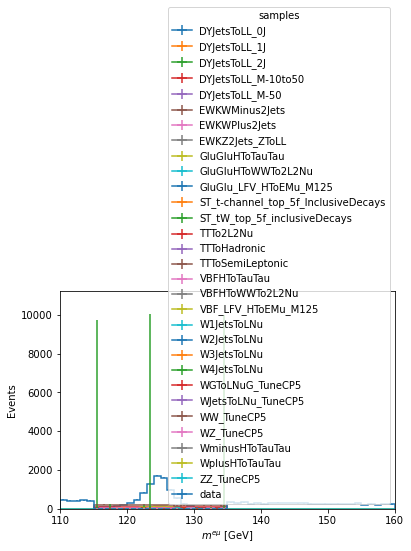

In [20]:
from coffea.util import save, load
from coffea import hist

histo = load("../results/2018/bTagWP/output_v1p2.coffea")
hist.plot1d(histo[0]['emMass_deepjet_L'])

/afs/hep.wisc.edu/home/kaho/miniconda3/envs/coffeaenv_conda/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


<AxesSubplot:xlabel='$m^{e\\mu}$ [GeV]', ylabel='Events'>

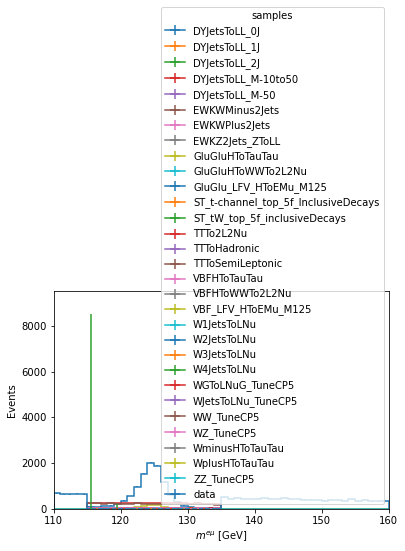

In [21]:
hist.plot1d(histo[0]['emMass_deepjet_M'])

In [32]:
from coffea.util import save, load
from coffea import hist

years = ['2017','2018']
for year in years:
    histo = load(f"../results/{year}/bTagWP/output_v1p2.coffea")

    deepJet_None, deepJet_L, deepJet_M, deepJet_T = histo[0]['emMass'], histo[0]['emMass_deepjet_L'], histo[0]['emMass_deepjet_M'], histo[0]['emMass_deepjet_T']
    #deepcsv_L, deepcsv_M = histo[0]['emMass_deepcsv_L'].values(), histo[0]['emMass_deepcsv_M'].values()

    list_of_t = ['TTTo2L2Nu', 'TTToSemiLeptonic', 'TTToHadronic', 
                  'ST_tW_antitop_5f_inclusiveDecays', 'ST_tW_top_5f_inclusiveDecays', 
                  'ST_t-channel_antitop_5f_inclusiveDecays', 'ST_t-channel_top_5f_InclusiveDecays']

    list_of_SMH = ['GluGluHToTauTau', 'VBFHToTauTau', 
                   'WminusHToTauTau', 'WplusHToTauTau', 
                   'GluGluHToWWTo2L2Nu', 'VBFHToWWTo2L2Nu', 'ZHToTauTau']

    list_of_diboson = ['ZZ_TuneCP5', 'WZ_TuneCP5', 'WW_TuneCP5']

    list_of_DY = ['DYJetsToLL_M-50', 'DYJetsToLL_0J', 'DYJetsToLL_1J', 'DYJetsToLL_2J', 'DYJetsToLL_M-10to50']

    list_of_WJ = ['WJetsToLNu_TuneCP5', 'W1JetsToLNu', 'W2JetsToLNu', 'W3JetsToLNu', 'W4JetsToLNu'] #WJetsToLNu_0J', 'WJetsToLNu_1J', 'WJetsToLNu_2J', 'WGToLNuG_TuneCP5']

    list_of_EWK = ['EWKZ2Jets_ZToLL', 'EWKZ2Jets_ZToNuNu', 'EWKWMinus2Jets', 'EWKWPlus2Jets']

    signals = ['GluGlu_LFV_HToEMu_M125', 'VBF_LFV_HToEMu_M125']

    bkgs = list_of_t+list_of_SMH+list_of_diboson+list_of_DY+list_of_WJ+list_of_EWK

    data_None, data_Jet_L, data_Jet_M, data_Jet_T = deepJet_None[('data',)].to_hist().sum().value, deepJet_L[('data',)].to_hist().sum().value, deepJet_M[['data'], :].to_hist().sum().value, deepJet_T[['data'], :].to_hist().sum().value   #[('data',)].sum(), deepJet_M[('data',)].sum()

    # # data_csv_L, data_csv_M = deepcsv_L[('data',)].sum(), deepcsv_M[('data',)].sum()

    signal_None = deepJet_None[(signals,)].to_hist().sum().value*5.9*10**-3
    signal_Jet_L = deepJet_L[(signals,)].to_hist().sum().value*5.9*10**-3
    signal_Jet_M = deepJet_M[(signals,)].to_hist().sum().value*5.9*10**-3
    signal_Jet_T = deepJet_T[(signals,)].to_hist().sum().value*5.9*10**-3

    t_None = deepJet_None[(list_of_t,)].to_hist().sum().value
    t_Jet_L = deepJet_L[(list_of_t,)].to_hist().sum().value
    t_Jet_M = deepJet_M[(list_of_t,)].to_hist().sum().value
    t_Jet_T = deepJet_T[(list_of_t,)].to_hist().sum().value

    bkg_None = deepJet_None[(bkgs,)].to_hist().sum().value
    bkg_Jet_L = deepJet_L[(bkgs,)].to_hist().sum().value
    bkg_Jet_M = deepJet_M[(bkgs,)].to_hist().sum().value
    bkg_Jet_T = deepJet_T[(bkgs,)].to_hist().sum().value
    
    # for i in signals:
    #     signal_Jet_L+= deepJet_L[(i,)].sum()
    #     signal_Jet_M+= deepJet_M[(i,)].sum()
    # #     signal_csv_L+= deepcsv_L[(i,)].sum()
    # #     signal_csv_M+= deepcsv_M[(i,)].sum()

    # for i in bkgs:
    #     bkg_Jet_L+= deepJet_L[(i,)].sum()
    #     bkg_Jet_M+= deepJet_M[(i,)].sum()
    # #     bkg_csv_L+= deepcsv_L[(i,)].sum()
    # #     bkg_csv_M+= deepcsv_M[(i,)].sum()

    print(f'{year}', 'Jet L', 'Jet M', 'Jet T', 'None')#, 'CSV L', 'CSV M' )
    print('signal', signal_Jet_L, signal_Jet_M, signal_Jet_T, signal_None)#, signal_csv_L, signal_csv_M)
    print('bkg', bkg_Jet_L, bkg_Jet_M, bkg_Jet_T, bkg_None)#, bkg_csv_L, bkg_csv_M)
    print('top', t_Jet_L, t_Jet_M, t_Jet_T, t_None)#, bkg_csv_L, bkg_csv_M)
    print('data', data_Jet_L, data_Jet_M, data_Jet_T, data_None)#, data_csv_L, data_csv_M)
    AMS_L, AMS_M, AMS_T, AMS_None = AMS(signal_Jet_L, bkg_Jet_L), AMS(signal_Jet_M, bkg_Jet_M), AMS(signal_Jet_T, bkg_Jet_T), AMS(signal_None, bkg_None)
    print('AMS', AMS_L, AMS_M, AMS_T, AMS_None)#, AMS(signal_csv_M, bkg_csv_M), AMS(signal_csv_M, bkg_csv_M))
    print('% gain', 200*(AMS_L-AMS_M)/(AMS_L+AMS_M), 200*(AMS_M-AMS_T)/(AMS_M+AMS_T), 200*(AMS_T-AMS_None)/(AMS_T+AMS_None))

2017 Jet L Jet M Jet T None
signal 35.485732122866644 42.58149783912888 43.5397252078824 43.98181479911887
bkg 4275.990957957429 6897.624317579845 10701.81757874549 29794.09731452253
top 1507.9885112891163 3667.176390115091 7409.882693545629 26465.3223629985
data 5792.0 9146.0 13812.0 36469.0
AMS 0.541921455640722 0.5121830946622639 0.4205937615490479 0.25474239741140636
% gain 5.6423930567248455 19.637994339873995 49.11668416894386
2018 Jet L Jet M Jet T None
signal 54.76177407272364 64.7796753437943 66.22842321190073 66.87041662761476
bkg 6493.2272856857 10246.04507497108 15331.674686956427 44072.118413476055
top 2168.2979302027898 5254.888920313562 10265.48636927153 38951.12379881274
data 8537.0 13154.0 19668.0 54285.0
AMS 0.6786384555616658 0.6392989133926604 0.5344873063738053 0.3184507645645654
% gain 5.969865199317935 17.858721674157717 50.657028726965954


/afs/hep.wisc.edu/home/kaho/miniconda3/envs/coffeaenv_conda/lib/python3.9/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f79c4b1df70>
  warnings.warn(
/afs/hep.wisc.edu/home/kaho/miniconda3/envs/coffeaenv_conda/lib/python3.9/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f79c4ae1760>
  warnings.warn(


93.02278108772077